In [1]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
def preprocess_text(text):
   
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in word_tokens if not w in stop_words]

    # Join the tokens back into a string
    preprocessed_text = " ".join(filtered_tokens)
    return preprocessed_text


# Example Usage:
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."
preprocessed_text = preprocess_text(input_text)
print(f"Original text: {input_text}")
print(f"Preprocessed text: {preprocessed_text}")

Original text: Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months.
Preprocessed text: patient john doe years old diagnosed type diabetes complains frequent urination fatigue increased thirst prescribed metformin mg daily scheduled followup months


In [2]:
import spacy

def perform_ner(text):
    """
    Performs Named Entity Recognition using spaCy.

    Args:
        text: The input text.

    Returns:
        A dictionary of extracted entities.
    """
    # Load the spaCy model (you might need to download it: python -m spacy download en_core_web_sm)
    nlp = None  # Initialize nlp to None
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading en_core_web_sm model for spaCy...")
        try:
            import subprocess
            subprocess.check_call(["python", "-m", "spacy", "download", "en_core_web_sm"])
            nlp = spacy.load("en_core_web_sm")
        except Exception as e:
            print(f"Error downloading en_core_web_sm: {e}")
            return {}  # Return an empty dictionary if model can't be loaded

    if nlp is None:  # Check if nlp is still None
        print("spaCy model could not be loaded.")
        return {}

    doc = nlp(text)
    entities = {}
    for ent in doc.ents:
        if ent.label_ in entities:
            entities[ent.label_].append(ent.text)
        else:
            entities[ent.label_] = [ent.text]
    return entities

# Example Usage:
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."
ner_entities = perform_ner(input_text)

print("NER Entities:")
for label, entity_list in ner_entities.items():
    print(f"{label}: {entity_list}")

NER Entities:
PERSON: ['John Doe']
DATE: ['45 years old', '3 months']
CARDINAL: ['2', '500']


In [3]:
import spacy

def perform_ner(text):
    """
    Performs Named Entity Recognition using spaCy and returns a list of (entity, label) tuples.

    Args:
        text: The input text.

    Returns:
        A list of (entity, label) tuples.  Returns an empty list on error.
    """
    nlp = None  # Initialize nlp to None
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading en_core_web_sm model for spaCy...")
        try:
            import subprocess
            subprocess.check_call(["python", "-m", "spacy", "download", "en_core_web_sm"])
            nlp = spacy.load("en_core_web_sm")
        except Exception as e:
            print(f"Error downloading en_core_web_sm: {e}")
            return []  # Return an empty list if model can't be loaded

    if nlp is None:  # Check if nlp is still None
        print("spaCy model could not be loaded.")
        return []

    doc = nlp(text)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))  # Append (entity, label) tuple
    return entities

# Example Usage:
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."
ner_entities = perform_ner(input_text)

print("Extracted Entities:")
print(ner_entities)

Extracted Entities:
[('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500', 'CARDINAL'), ('3 months', 'DATE')]


In [6]:
from textblob import TextBlob

def analyze_sentiment(text):
    """
    Analyzes the sentiment of a text using TextBlob.

    Args:
        text: The input text.

    Returns:
        A dictionary containing:
            - 'label': 'positive', 'negative', or 'neutral' based on polarity.
            - 'score': The polarity score, forced to 0.0 if close to neutral.
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if abs(polarity) < 0.1:  # Adjust threshold as needed
        polarity = 0.0  # Force to neutral score

    if polarity > 0.0:
        label = 'positive'
    elif polarity < 0.0:
        label = 'negative'
    else:
        label = 'neutral'

    return {'label': label, 'score': polarity}


# Given input
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."

# Analyze sentiment
sentiment = analyze_sentiment(input_text)

# Print the results
print("Sentiment Analysis Result:")
print(sentiment)

Sentiment Analysis Result:
{'label': 'neutral', 'score': 0.0}


In [5]:
!pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ------ --------------------------------- 102.4/624.3 kB 3.0 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/624.3 kB 4.9 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 2.5 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/624.3 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/624.3 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 430.1/624.3 kB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 430.1

In [7]:
from textblob import TextBlob

def analyze_sentiment(text):
    """
    Analyzes the sentiment of a text using TextBlob.

    Args:
        text: The input text.

    Returns:
        A dictionary containing:
            - 'label': 'positive', 'negative', or 'neutral' based on polarity.
            - 'score': The polarity score, forced to 0.0 if close to neutral.
    """
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if abs(polarity) < 0.1:  # Adjust threshold as needed
        polarity = 0.0  # Force to neutral score

    if polarity > 0.0:
        label = 'positive'
    elif polarity < 0.0:
        label = 'negative'
    else:
        label = 'neutral'

    return {'label': label, 'score': polarity}


# Given input
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."

# Analyze sentiment
sentiment = analyze_sentiment(input_text)

# Print the results
print("Sentiment Analysis Result:")
print(sentiment)

Sentiment Analysis Result:
{'label': 'neutral', 'score': 0.0}


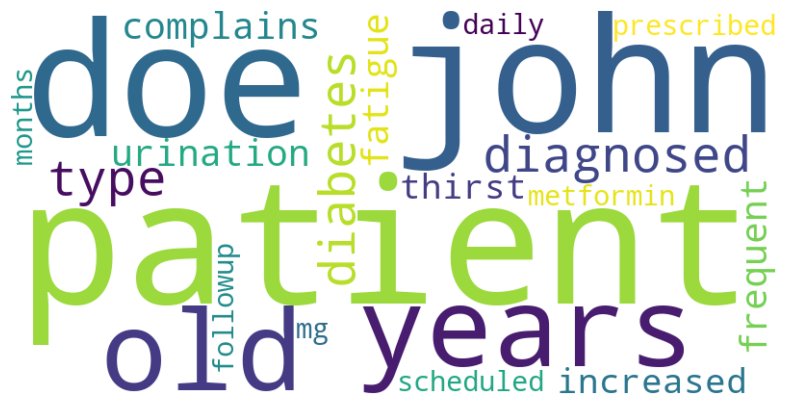

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text):
    """
    Generates a word cloud visualization.

    Args:
        text: The input text.

    Returns:
        None. Displays the word cloud using matplotlib.
    """

    # 1. Preprocess the text:
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    word_tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [w for w in word_tokens if not w in stop_words]

    # Join the tokens back into a string
    preprocessed_text = " ".join(filtered_tokens)

    # 2. Generate the word cloud:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(preprocessed_text)

    # 3. Display the word cloud:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()  # Display the word cloud

    # File saving removed - output is now display only.
    return None

# Example Usage:
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."
generate_word_cloud(input_text)

In [9]:
import spacy
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def extract_patient_insights(text):
    """
    Extracts key entities and performs sentiment analysis to provide patient insights.

    Args:
        text: The input medical text.

    Returns:
        A dictionary containing extracted entities and sentiment analysis results.
    """

    # --- 1. Named Entity Recognition (NER) ---
    nlp = None
    try:
        nlp = spacy.load("en_core_web_sm")
    except OSError:
        print("Downloading en_core_web_sm model for spaCy...")
        try:
            import subprocess
            subprocess.check_call(["python", "-m", "spacy", "download", "en_core_web_sm"])
            nlp = spacy.load("en_core_web_sm")
        except Exception as e:
            print(f"Error downloading en_core_web_sm: {e}")
            return {}  # Return empty dictionary on failure

    if nlp is None:
        print("SpaCy model could not be loaded.")
        return {}

    doc = nlp(text)
    key_entities = [(ent.text, ent.label_) for ent in doc.ents]


    # --- 2. Sentiment Analysis ---
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if abs(polarity) < 0.1:  # Adjust threshold as needed
        sentiment_score = 0.0  # Force to neutral
        overall_sentiment = 'neutral'
    elif polarity > 0:
        overall_sentiment = 'positive'
        sentiment_score = polarity
    else:
        overall_sentiment = 'negative'
        sentiment_score = polarity


    # --- 3. Combine Results ---
    insights = {
        'Key Entities': key_entities,
        'Overall Sentiment': overall_sentiment,
        'Sentiment Score': sentiment_score
    }

    return insights


# Example Usage:
input_text = "Patient John Doe, 45 years old, diagnosed with Type 2 Diabetes. Complains of frequent urination, fatigue, and increased thirst. Prescribed Metformin 500mg daily. Scheduled follow-up in 3 months."
patient_insights = extract_patient_insights(input_text)

print("Extracted Patient Insights:")
print(patient_insights)

Extracted Patient Insights:
{'Key Entities': [('John Doe', 'PERSON'), ('45 years old', 'DATE'), ('2', 'CARDINAL'), ('500', 'CARDINAL'), ('3 months', 'DATE')], 'Overall Sentiment': 'neutral', 'Sentiment Score': 0.0}
